# Lab 05

# Preprocessing

## Text Wrangling

Text wrangling is a converting/gathering/extracting formatted text from the raw data. 

### HTML

For example, HTML does not include only text. Even you extract only the text from HTML, they are not all meaningful (i.e. advertisements).

Have a look at the [news article](https://www.smh.com.au/technology/low-key-launch-as-apple-revamps-the-ipad-mini-and-brings-back-ipad-air-20190320-p515mf.html). We might be only interested in getting headline and main contents of the article.

The following code removes some irrelevant tags (i.e. script, style, link, etc.) and displays the remained tags. ()
    


In [0]:
import urllib
from bs4 import BeautifulSoup

url = "https://www.smh.com.au/technology/low-key-launch-as-apple-revamps-the-ipad-mini-and-brings-back-ipad-air-20190320-p515mf.html"
html = urllib.request.urlopen(url).read()
soup = BeautifulSoup(html)

# remove not relevant tags (script, style, link, etc.)
for script in soup(["script", "style", "link", "head", "noscript"]):
    script.extract()    # rip it out

# get text
text = soup.get_text()

print(soup.prettify())

<!DOCTYPE html>
<html lang="en">
 <body>
  <div id="app">
   <div data-reactroot="">
    <div>
     <div aria-atomic="true" aria-live="off" class="_2O3rv" id="page_announcer" tabindex="-1">
      Low-key launch as Apple revamps the iPad mini and brings back iPad Air
     </div>
     <div>
     </div>
     <nav class="RbLp5">
      <a href="#sections">
       Skip to sections navigation
      </a>
      <a href="#content">
       Skip to content
      </a>
      <a href="#footer">
       Skip to footer
      </a>
     </nav>
     <header class="_21UZG noPrint">
      <div class="_2L98J">
       <ul>
        <li class="PJUwX">
         <a aria-controls="navigation" aria-expanded="false" href="javascript:void(0);">
          Our network
         </a>
        </li>
        <li class="_3CYE0">
         <div class="_3LlBk">
          <a class="_2dAsA" href="https://subscribe.smh.com.au/?promote_channel=HI_SMH_GNL_HL">
           Subscribe
          </a>
          <button class="_3S9ou">
    

**Try &lt;p&gt;  tag**

Using &lt;p&gt;  tag is a common way to extract the main contents of the online news articles. BUT, do not expect this always provides what you want.

In [0]:
p_tags = soup.findAll('p',text=True)
for i, p_tag in enumerate(p_tags): 
    print(str(i) + str(p_tag))

0<p>Apple has launched a new mid-tier iPad with a larger screen and the first iPad mini update since 2015.</p>
1<p>The announcement on Monday come a week before the company rolls out a media and entertainment bundle designed to compete with Netflix.</p>
2<p>The company debuted a new iPad Air with a 10.5-inch screen, bringing back a model that was phased out when Apple launched the iPad Pro a few years ago.</p>
3<p>That screen size is larger than the 9.7-inch, $US329 model designed for education that Apple launched last year. The iPad mini, a device that some consumers have been seeking an upgrade for, continues to use a 7.9-inch screen. The new, larger iPad introduced supports the company's Smart Keyboard, while both new devices work with the Apple Pencil stylus and include a faster A12 processor, a step up from the A10 chip used in last year's education model.</p>
4<p>The new models still use a home button with fingerprint scanner rather than facial recognition like on the more expens

## Punctuations removal

### Using a list of punctuations

In [0]:
puncts = [',', '.', '"', ':', ')', '(', '-', '!', '?', '|', ';', "'", '$', '&', '/', '[', ']', '>', '%', '=', '#', '*', '+', '\\', '•',  '~', '@', '£', 
 '·', '_', '{', '}', '©', '^', '®', '`',  '<', '→', '°', '€', '™', '›',  '♥', '←', '×', '§', '″', '′', 'Â', '█', '½', 'à', '…', 
 '“', '★', '”', '–', '●', 'â', '►', '−', '¢', '²', '¬', '░', '¶', '↑', '±', '¿', '▾', '═', '¦', '║', '―', '¥', '▓', '—', '‹', '─', 
 '▒', '：', '¼', '⊕', '▼', '▪', '†', '■', '’', '▀', '¨', '▄', '♫', '☆', 'é', '¯', '♦', '¤', '▲', 'è', '¸', '¾', 'Ã', '⋅', '‘', '∞', 
 '∙', '）', '↓', '、', '│', '（', '»', '，', '♪', '╩', '╚', '³', '・', '╦', '╣', '╔', '╗', '▬', '❤', 'ï', 'Ø', '¹', '≤', '‡', '√', ]

def remove_punctuation(x):
    x = str(x)
    for punct in puncts:
        if punct in x:
            x = x.replace(punct, '')
    return x


text = "It's a nice day[]"
print(remove_punctuation(text))


Its a nice day


### Using a regular expression ([re package](https://docs.python.org/3/library/re.html))

In [0]:
import re

def remove_punctuation_re(x):
    x = re.sub(r'[^\w\s]','',x)
    
    return x


text = "It's a nice day[]"

print(remove_punctuation_re(text))

Its a nice day


### What about emoticons?
*   :)
*   :D
*   :(


[TweetTokenizer (NLTK) may give you a solution](https://www.nltk.org/_modules/nltk/tokenize/casual.html#TweetTokenizer)


In [0]:
EMOTICONS = r"""
    (?:
      [<>]?
      [:;=8]                     # eyes
      [\-o\*\']?                 # optional nose
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      |
      [\)\]\(\[dDpP/\:\}\{@\|\\] # mouth
      [\-o\*\']?                 # optional nose
      [:;=8]                     # eyes
      [<>]?
      |
      <3                         # heart
    )"""

### What about contractions of words?


In [0]:
# These are just common English contractions. There are many edge cases. i.e. University's working on it.
contraction_dict = {"ain't": "is not", "aren't": "are not","can't": "cannot", "'cause": "because", "could've": "could have", 
                    "couldn't": "could not", "didn't": "did not",  "doesn't": "does not", "don't": "do not", "hadn't": "had not", 
                    "hasn't": "has not", "haven't": "have not", "he'd": "he would","he'll": "he will", "he's": "he is", "how'd": "how did", 
                    "how'd'y": "how do you", "how'll": "how will", "how's": "how is",  "I'd": "I would", "I'd've": "I would have", 
                    "I'll": "I will", "I'll've": "I will have","I'm": "I am", "I've": "I have", "i'd": "i would", "i'd've": "i would have", 
                    "i'll": "i will",  "i'll've": "i will have","i'm": "i am", "i've": "i have", "isn't": "is not", "it'd": "it would", 
                    "it'd've": "it would have", "it'll": "it will", "it'll've": "it will have","it's": "it is", "let's": "let us", 
                    "ma'am": "madam", "mayn't": "may not", "might've": "might have","mightn't": "might not","mightn't've": "might not have", 
                    "must've": "must have", "mustn't": "must not", "mustn't've": "must not have", "needn't": "need not", "needn't've": "need not have",
                    "o'clock": "of the clock", "oughtn't": "ought not", "oughtn't've": "ought not have", "shan't": "shall not", "sha'n't": "shall not", 
                    "shan't've": "shall not have", "she'd": "she would", "she'd've": "she would have", "she'll": "she will", "she'll've": "she will have", 
                    "she's": "she is", "should've": "should have", "shouldn't": "should not", "shouldn't've": "should not have", "so've": "so have",
                    "so's": "so as", "this's": "this is","that'd": "that would", "that'd've": "that would have", "that's": "that is", "there'd": "there would", 
                    "there'd've": "there would have", "there's": "there is", "here's": "here is","they'd": "they would", "they'd've": "they would have", 
                    "they'll": "they will", "they'll've": "they will have", "they're": "they are", "they've": "they have", "to've": "to have", "wasn't": "was not", 
                    "we'd": "we would", "we'd've": "we would have", "we'll": "we will", "we'll've": "we will have", "we're": "we are", "we've": "we have", 
                    "weren't": "were not", "what'll": "what will", "what'll've": "what will have", "what're": "what are",  "what's": "what is", "what've": "what have", 
                    "when's": "when is", "when've": "when have", "where'd": "where did", "where's": "where is", "where've": "where have", "who'll": "who will", 
                    "who'll've": "who will have", "who's": "who is", "who've": "who have", "why's": "why is", "why've": "why have", "will've": "will have", 
                    "won't": "will not", "won't've": "will not have", "would've": "would have", "wouldn't": "would not", "wouldn't've": "would not have", 
                    "y'all": "you all", "y'all'd": "you all would","y'all'd've": "you all would have","y'all're": "you all are","y'all've": "you all have",
                    "you'd": "you would", "you'd've": "you would have", "you'll": "you will", "you'll've": "you will have", "you're": "you are", "you've": "you have"}

## Stopwords removal

In [0]:
import nltk
nltk.download('punkt')
nltk.download('stopwords')

from nltk.corpus import stopwords as sw
from nltk.tokenize import word_tokenize

my_sent = "Natural Language Processing is fun but challenging."
tokens = word_tokenize(my_sent)

filtered_sentence = [w for w in tokens if not w in sw.words()]

print(filtered_sentence)

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
['Natural', 'Language', 'Processing', 'fun', 'challenging', '.']


## Decapitalisation

In [0]:
text = "Hello there!"
print(text.lower())


#Should we decapitalise every word?
text2 = "I love University of Sydney :D"
print(text2.lower())

hello there!
i love university of sydney :d


## Stemming

Try various types of NLTK stemmer in [demo](http://text-processing.com/demo/stem/)

A comparative study of stemming algorithm: [Paper Link](https://pdfs.semanticscholar.org/1c0c/0fa35d4ff8a2f925eb955e48d655494bd167.pdf)


In [0]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

plurals = ['caresses', 'flies', 'dies', 'mules', 'denied',
            'died', 'agreed', 'owned', 'humbled', 'sized',
            'meeting', 'stating', 'siezing', 'itemization',
            'sensational', 'traditional', 'reference', 'colonizer',
            'plotted']
singles = [stemmer.stem(plural) for plural in plurals]

print(singles)

['caress', 'fli', 'die', 'mule', 'deni', 'die', 'agre', 'own', 'humbl', 'size', 'meet', 'state', 'siez', 'item', 'sensat', 'tradit', 'refer', 'colon', 'plot']


## Lemmatising

NLTK Wordnet


In [0]:
nltk.download('wordnet')

from nltk.stem import WordNetLemmatizer

lemmatizer = WordNetLemmatizer()

print(lemmatizer.lemmatize("cats"))
print(lemmatizer.lemmatize("cacti"))
print(lemmatizer.lemmatize("geese"))
print(lemmatizer.lemmatize("rocks"))
print(lemmatizer.lemmatize("python"))
print(lemmatizer.lemmatize("better", pos="a"))
print(lemmatizer.lemmatize("best", pos="a"))
print(lemmatizer.lemmatize("run"))
print(lemmatizer.lemmatize("run",'v'))

[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Unzipping corpora/wordnet.zip.
cat
cactus
goose
rock
python
good
best
run
run


## Tokenisation

Try various types of NLTK Tokenizer in [demo](http://text-processing.com/demo/tokenize/). 

[NLTK Tokeniser API Doc](https://www.nltk.org/api/nltk.tokenize.html)

### TweetTokenizer

In [0]:
from nltk.tokenize import TweetTokenizer
tknzr = TweetTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':)', ';)']
['I', 'am', 'so', 'sad', ':(']


### TreebankWordTokenizer

In [0]:
from nltk.tokenize import TreebankWordTokenizer
tknzr = TreebankWordTokenizer()

s0 = "I am so happy :) ;)" 

print(tknzr.tokenize(s0))

s0 = "I am so sad :("

print(tknzr.tokenize(s0))

['I', 'am', 'so', 'happy', ':', ')', ';', ')']
['I', 'am', 'so', 'sad', ':', '(']


# Word Cloud




*   [Word Cloud](https://amueller.github.io/word_cloud/index.html)
*   [Wikipedia Python](https://pypi.org/project/wikipedia/)



In [0]:
!pip install wikipedia

  Stored in directory: /root/.cache/pip/wheels/87/2a/18/4e471fd96d12114d16fe4a446d00c3b38fb9efcb744bd31f4a
Successfully built wikipedia


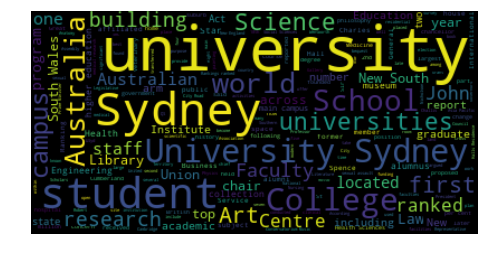

In [0]:
from wordcloud import WordCloud
import wikipedia

# Getting wikipedia contents of "University of Sydney"
text = wikipedia.page("University of Sydney").content

# Generate a word cloud image
wordcloud = WordCloud().generate(text)

# Display the generated image:
# the matplotlib way:
import matplotlib.pyplot as plt

plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()



Try more word cloud examples: [Link](https://amueller.github.io/word_cloud/auto_examples/index.html)

# Exercise

In this exercise, you are required to make word cloud generator. The implemented code should be able to activate/deactivate preprocessing techniques by settings. The final output of your code should display the word cloud of preprocessed (only selected techniques) data. You need to implement the following techniques:

*   Removing punctuation
*   Decapitalise
*   Removing stopwords

**When you generate word cloud, YOU MUST use  [generate_from_frequencies()](https://amueller.github.io/word_cloud/generated/wordcloud.WordCloud.html#wordcloud.WordCloud.generate_from_frequencies). **

In [0]:
!pip install wikipedia

In [0]:
# # You should submit "ipynb" file (You can download it from "File" > "Download .ipynb") to Canvas
# # Please include the required libraries

import matplotlib.pyplot as plt
from wordcloud import WordCloud
import wikipedia

class WikiWordCloud:
    
    _word = ""
    # add more class attributes if required
    
    
    def __init__(self, word):
        self._word = word
    
    # preprocessing the contents of wiki page of the _word, pre
    def preprocess(self, punctuations=False, decapitalisation=False, stopwords=False):


    # getting the contents of wiki page
    def get_wiki_contents(self):

        
    # displaying word cloud
    def display_cloud(self):
        


    # add more class methods if required
    
    
    
    
word = "University of Sydney"
wwc = WikiWordCloud(word)

wwc.get_wiki_contents()


wwc.preprocess(punctuations=False, decapitalisation=True, stopwords=False)
wwc.display_cloud()


wwc.preprocess(punctuations=False, decapitalisation=True, stopwords=True)
wwc.display_cloud()


wwc.preprocess(punctuations=True, decapitalisation=True, stopwords=True)
wwc.display_cloud()


# Extension: Saving models

## Saving model

In [0]:
#Create/Train a simple model.
import tensorflow as tf

import numpy
import matplotlib.pyplot as plt

tf.reset_default_graph()

# An epoch is one iteration over the entire input data
no_of_epochs = 5000
# How often you want to display training info.
display_interval = 200

# training data
x_training = numpy.asarray([1,2,5,8,9,12,14,16,18,20])
y_training = numpy.asarray([1500,3500,7200,11000,12500,18500,22000,24500,28000,30500])

# Set variables for the model
W = tf.Variable(numpy.random.randn(), name="Weight")
print(W)
b = tf.Variable(numpy.random.randn(), name="bias")

# Placeholders for the model
X = tf.placeholder(tf.float32)
Y = tf.placeholder(tf.float32)

# Hypothesis = W * X + b (Linear Model)
H = tf.add(tf.multiply(W, X), b)

# Cost for calculating the model performance 
cost = tf.reduce_sum(tf.pow(H-Y, 2))/(2*x_training.shape[0])

# Gradient descent optimizer with learning rate 0.01
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01)

# Target (training model) to be executed
train_model = optimizer.minimize(cost)

# Initialize the variables (i.e. assign their default value)
init = tf.global_variables_initializer()




In [0]:
saver = tf.train.Saver()

with tf.Session() as sess:

    sess.run(init)

    # Every epoch, the model will be modified by the given learning rate
    for epoch in range(no_of_epochs):
        sess.run(train_model, feed_dict={X:x_training, Y:y_training})    
        # every display_interval loop, the training information will be displayed
        if epoch % display_interval == 0 :
            # calculate the cost of the current model
            c = sess.run(cost, feed_dict={X:x_training, Y:y_training})            
            print("Epoch:", '%04d' % (epoch), "cost=", "{:.8f}".format(c), 
                    "W=", "{:.4f}".format(sess.run(W)), "b=",  "{:.4f}".format(sess.run(b)))

        
    print("=========================================================")
    training_cost = sess.run(cost, feed_dict={X:x_training, Y:y_training})
    print("Optimised:", "cost=", "{:.9f}".format(training_cost), 
                "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(x_training, y_training, 'ro', label='Training data')
    plt.plot(x_training, sess.run(W) * x_training + sess.run(b), label='Linear')
    plt.legend()
    plt.show()

    
    # Save the model - This will generate three files: 
    # 1) model_final.ckpt.index, 2) model_final.ckpt.meta, 3) model_final.ckpt.data-#-of-# (model_final.ckpt.data-00000-of-00001)
    saver.save(sess, 'model_final.ckpt')
    
    

##Loading model

In [0]:
saver = tf.train.Saver()

with tf.Session() as sess:
    
    sess.run(init)
    
    # Restore (Load) the model
    saver.restore(sess, "./model_final.ckpt")
    
    
     # You can also re-train the model
        
#     # Every epoch, the model will be modified by the given learning rate
#     for epoch in range(no_of_epochs):
#         sess.run(train_model, feed_dict={X:x_training, Y:y_training})    
#         # every display_interval loop, the training information will be displayed
#         if epoch % display_interval == 0 :
#             # calculate the cost of the current model
#             c = sess.run(cost, feed_dict={X:x_training, Y:y_training})            
#             print("Epoch:", '%04d' % (epoch), "cost=", "{:.8f}".format(c), 
#                     "W=", "{:.4f}".format(sess.run(W)), "b=",  "{:.4f}".format(sess.run(b)))

        
    print("=========================================================")
    training_cost = sess.run(cost, feed_dict={X:x_training, Y:y_training})
    print("Optimised:", "cost=", "{:.9f}".format(training_cost), 
                "W=", sess.run(W), "b=", sess.run(b))
    
    plt.plot(x_training, y_training, 'ro', label='Training data')
    plt.plot(x_training, sess.run(W) * x_training + sess.run(b), label='Linear')
    plt.legend()
    plt.show()


## Sample codes from Google Colab

If you want to have a look more about the Save & Restore, [this tutorial](https://www.tensorflow.org/guide/saved_model) would be a good resource for you.

In [0]:
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3], initializer = tf.zeros_initializer)
v2 = tf.get_variable("v2", shape=[5], initializer = tf.zeros_initializer)

inc_v1 = v1.assign(v1+1)
dec_v2 = v2.assign(v2-1)

# Add an op to initialize the variables.
init_op = tf.global_variables_initializer()

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, initialize the variables, do some work, and save the
# variables to disk.
with tf.Session() as sess:
    sess.run(init_op)
    # Do some work with the model.
    inc_v1.op.run()
    dec_v2.op.run()
    # Save the variables to disk.
    save_path = saver.save(sess, "./tmp_model.ckpt")
    print("Model saved in path: %s" % save_path)

In [0]:
tf.reset_default_graph()

# Create some variables.
v1 = tf.get_variable("v1", shape=[3])
v2 = tf.get_variable("v2", shape=[5])

# Add ops to save and restore all the variables.
saver = tf.train.Saver()

# Later, launch the model, use the saver to restore variables from disk, and
# do some work with the model.
with tf.Session() as sess:
    # Restore variables from disk.
    saver.restore(sess, "./tmp_model.ckpt")
    print("Model restored.")
    # Check the values of the variables
    print("v1 : %s" % v1.eval())
    print("v2 : %s" % v2.eval())

## Save (Upload) the model to your Google Drive

There are various ways to upload the files on Google Drive.

[This tutorial](https://colab.research.google.com/notebooks/io.ipynb#scrollTo=RWSJpsyKqHjH) will guide you how to save the files on your Google Drive.

1.   Mounting Google Drive locally
2.   Create a new Drive file

